# Imports

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Constants

In [2]:
num_iterations = 4000
learning_rate = 0.1
epsilon = 1e-8

# Algorithm to optimize

In [3]:
class QuadraticFunction(nn.Module):
    def __init__(self):
        super(QuadraticFunction, self).__init__()
        self.theta = nn.Parameter(torch.tensor(0.0))
        self.actual_value = nn.Parameter(torch.tensor(3.0))

    def forward(self):
        return (self.theta - self.actual_value) ** 2

# Gradient descent

In [4]:
model = QuadraticFunction()
gradient_descent = []

for t in range(num_iterations):
    gradient_descent.append(model.theta.item())
    
    model.zero_grad()
    loss = model()
    loss.backward()
    
    with torch.no_grad():
        model.theta -= learning_rate * model.theta.grad

print(f"Final Iteration {t+1}:")
print(f"  Theta = {model.theta.item()}")
print(f"  Loss = {loss.item()}", end='\n\n')

Final Iteration 4000:
  Theta = 2.999999523162842
  Loss = 2.2737367544323206e-13



# Gradient descent using Momentum

In [5]:
model = QuadraticFunction()
previous_grad = torch.zeros_like(model.theta)
gamma = 0.9
momentum = []

for t in range(num_iterations):
    momentum.append(model.theta.item())
    
    model.zero_grad()
    loss = model()
    loss.backward()
    
    with torch.no_grad():
        previous_grad = gamma * previous_grad + learning_rate * model.theta.grad
        model.theta -= previous_grad

print(f"Final Iteration {t+1}:")
print(f"  Theta = {model.theta.item()}")
print(f"  Loss = {loss.item()}", end='\n\n')

Final Iteration 4000:
  Theta = 3.0
  Loss = 0.0



# Nestrov accelerated gradient

In [6]:
model = QuadraticFunction()
previous_grad = torch.zeros_like(model.theta)
gamma = 0.9
nas = []

for t in range(num_iterations):
    nas.append(model.theta.item())
    
    model.zero_grad()
    lookahead_theta = model.theta - gamma * previous_grad
    loss = (lookahead_theta - model.actual_value) ** 2
    loss.backward()
    
    with torch.no_grad():
        previous_grad = gamma * previous_grad + learning_rate * model.theta.grad
        model.theta -= previous_grad

print(f"Final Iteration {t+1}:")
print(f"  Theta = {model.theta.item()}")
print(f"  Loss = {loss.item()}", end='\n\n')

Final Iteration 4000:
  Theta = 3.0
  Loss = 0.0



# Gradient descent using AdaGrade

In [7]:
model = QuadraticFunction()
gradient_sum = torch.zeros_like(model.theta)
gamma = 0.9
ada_grade = []

for t in range(num_iterations):
    ada_grade.append(model.theta.item())
    
    model.zero_grad()
    loss = model()
    loss.backward()
    
    with torch.no_grad():
        gradient_sum += model.theta.grad ** 2
        adaptive_learning_rate = learning_rate / torch.sqrt(gradient_sum + epsilon)
        model.theta -= adaptive_learning_rate * model.theta.grad

print(f"Final Iteration {t+1}:")
print(f"  Theta = {model.theta.item()}")
print(f"  Loss = {loss.item()}", end='\n\n')

Final Iteration 4000:
  Theta = 2.9999709129333496
  Loss = 8.460574463242665e-10



# Gradient descent using Adadelta

In [8]:
model = QuadraticFunction()

rho = 0.90
epsilon = 1e-8
Exp_sqr_grade = 0.0
Exp_sqr_theta = 0.0
ada_delta = []

for t in range(num_iterations):
    ada_delta.append(model.theta.item())
    
    model.zero_grad()
    loss = model()
    loss.backward()
    
    grade = model.theta.grad.item()
    
    Exp_sqr_grade = rho * Exp_sqr_grade + (1 - rho) * (grade ** 2)
    
    delta_theta = - (np.sqrt(Exp_sqr_theta + epsilon) / np.sqrt(Exp_sqr_grade + epsilon)) * grade

    Exp_sqr_theta = rho * Exp_sqr_theta + (1 - rho) * delta_theta ** 2
    
    with torch.no_grad():
        model.theta += delta_theta

print(f"Iteration {t+1}:")
print(f"  Theta = {model.theta.item()}")
print(f"  Gradient = {grade}")
print(f"  Exp_sqr_grade = {Exp_sqr_grade}")
print(f"  delta_theta = {delta_theta}")
print(f"  Exp_sqr_theta = {Exp_sqr_theta}")
print(f"  Loss = {loss.item()}\n")

Iteration 4000:
  Theta = 2.9999983310699463
  Gradient = -4.76837158203125e-06
  Exp_sqr_grade = 4.1205578440082965e-07
  delta_theta = 7.480058154054567e-07
  Exp_sqr_theta = 3.472688101428629e-10
  Loss = 5.6843418860808015e-12



# Gradient descent using RMSProp

In [9]:
model = QuadraticFunction()
rho = 0.90
epsilon = 1e-8
Exp_sqr_grade = 0.0
rms_prop = []

for t in range(num_iterations):
    rms_prop.append(model.theta.item())
    
    model.zero_grad()
    loss = model()
    loss.backward()
    
    grade = model.theta.grad.item()
    
    Exp_sqr_grade = rho * Exp_sqr_grade + (1 - rho) * (grade ** 2)
    delta_theta = - learning_rate / np.sqrt(Exp_sqr_grade + epsilon) * grade
    
    with torch.no_grad():
        model.theta += delta_theta

print(f"Iteration {t+1}:")
print(f"  Theta = {model.theta.item()}")
print(f"  Gradient = {grade}")
print(f"  Exp_sqr_grade = {Exp_sqr_grade}")
print(f"  delta_theta = {delta_theta}")
print(f"  Loss = {loss.item()}\n")

Iteration 4000:
  Theta = 3.0
  Gradient = 0.0
  Exp_sqr_grade = 6.951393758930413e-182
  delta_theta = -0.0
  Loss = 0.0



# Gradient descent using Adam

In [10]:
model = QuadraticFunction()
b1 = 0.9
b2 = 0.999
m = torch.zeros_like(model.theta)
v = torch.zeros_like(model.theta)
adam = []

for t in range(1, num_iterations + 1):
    adam.append(model.theta.item())
    
    model.zero_grad()
    loss = model()
    loss.backward()
    
    m = b1 * m + (1 - b1) * model.theta.grad
    v = b2 * v + (1 - b2) * (model.theta.grad ** 2)
    
    m_hat = m / (1 - b1 ** t)
    v_hat = v / (1 - b2 ** t)
    
    with torch.no_grad():
        model.theta -= learning_rate * m_hat / (torch.sqrt(v_hat) + epsilon)

print(f"Final Iteration {t+1}:")
print(f"  Theta = {model.theta.item()}")
print(f"  Loss = {loss.item()}", end='\n\n')

Final Iteration 4001:
  Theta = 3.0
  Loss = 0.0



# Plotting performance

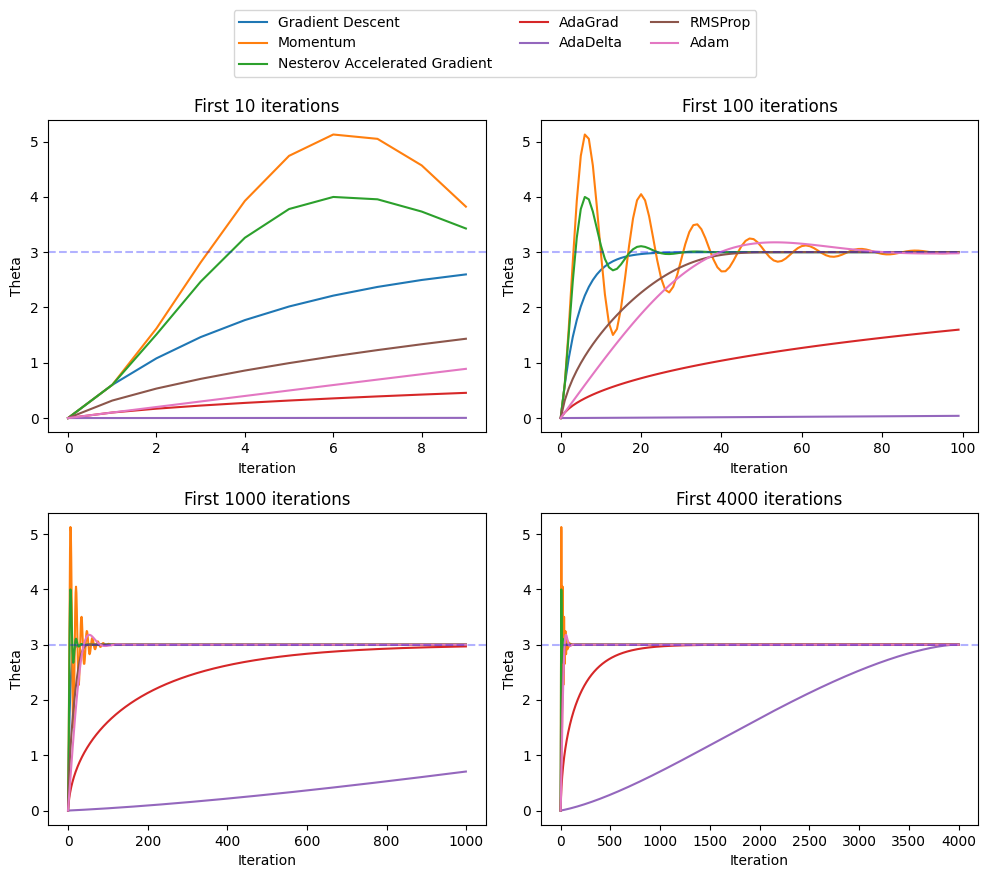

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

data = [
    (gradient_descent, 'Gradient Descent'),
    (momentum, 'Momentum'),
    (nas, 'Nesterov Accelerated Gradient'),
    (ada_grade, 'AdaGrad'),
    (ada_delta, 'AdaDelta'),
    (rms_prop, 'RMSProp'),
    (adam, 'Adam')
]

ranges = [10, 100, 1000, num_iterations]

for i, ax in enumerate(axes.flat):
    for j in range(len(data)):
        ax.plot(data[j][0][:ranges[i]], label=data[j][1])

    ax.axhline(y=int(QuadraticFunction().actual_value), color='b', linestyle='--', alpha=0.3)
    ax.set_title(f'First {ranges[i]} iterations')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Theta')
    
fig.legend(
    labels=[data[i][1] for i in range(len(data))], 
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.1),
    ncol=3
)

plt.tight_layout()

plt.show()